In [ ]:
#### JBL

In [ ]:
from sklearn.model_selection import ParameterGrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score, KFold,validation_curve,GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [ ]:
###############################################################################################


FSO Model Feature Importance - Top 10 Features
             Feature  Importance (%)
23          Distance       34.602872
22        Visibility       13.290077
21       Temperature        8.998038
20    ParticulateMin        6.692319
19     VisibilityMin        6.017538
18       Particulate        4.338259
17    TemperatureMin        4.326700
16     VisibilityMax        3.924440
15  AbsoluteHumidity        2.481359
14  RelativeHumidity        2.425692
FSO Feature Importance: [0.0013756834719638826, 0.0014475901962411166, 0.001688829503265037, 0.0022976870996964504, 0.002508960368624084, 0.004871569888196561, 0.005508789674681373, 0.00612239910061007, 0.008297964549845865, 0.010366062156981543, 0.019150413980220906, 0.02017077613747723, 0.02209459203493703, 0.023125734723246114, 0.024256922630951208, 0.024813589658797996, 0.03924440206859736, 0.04326699754104695, 0.04338259198411179, 0.06017538274060146, 0.06692319024632805, 0.08998038495915568, 0.13290076991766617, 0.34602871536675606]


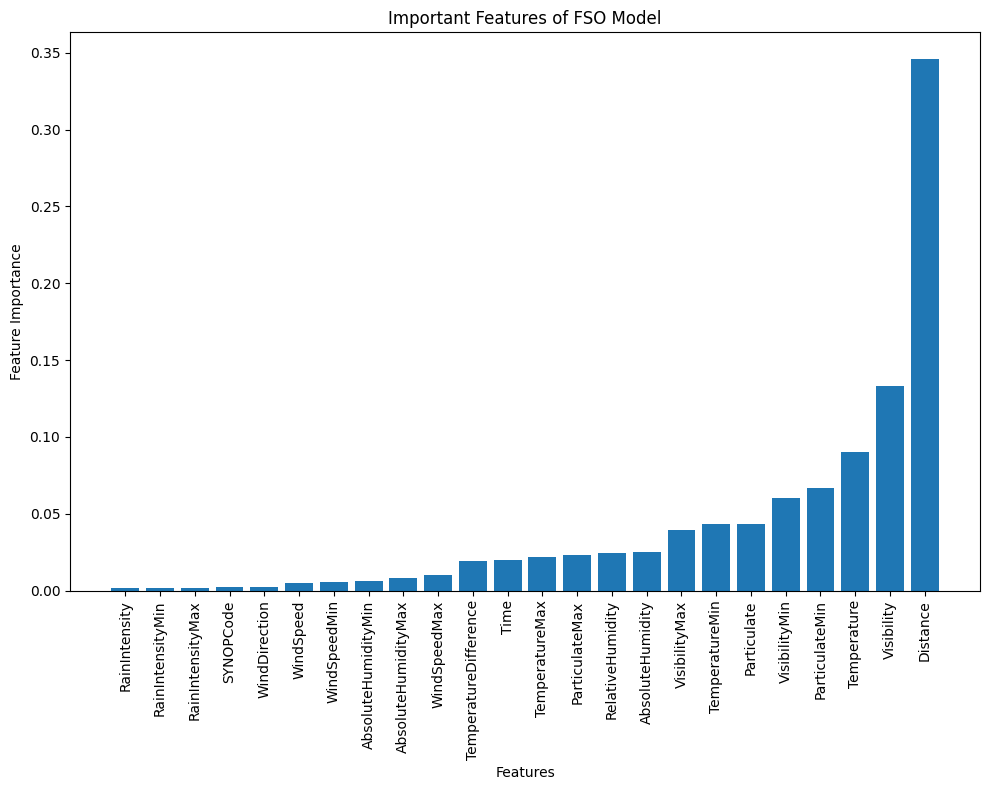


RF Model Feature Importance - Top 10 Features
             Feature  Importance (%)
24  AbsoluteHumidity       23.745065
23     RainIntensity       23.197853
22          Distance       20.884790
21  RainIntensityMax        8.017332
20  RainIntensityMin        6.794587
19       Temperature        3.070765
18         SYNOPCode        3.009202
17  RelativeHumidity        1.556364
16    ParticulateMax        1.390516
15         Frequency        1.164386
RF Feature Importance: [0.0008774999145240053, 0.0009107577701388533, 0.0009344623133349748, 0.002509360092022402, 0.00296845575072002, 0.0035452224181962, 0.004349413354810388, 0.0054858165451784026, 0.005986554022910478, 0.006108616358492049, 0.006405243426491186, 0.006810194079486713, 0.007194812619495501, 0.008033307306433797, 0.009571673267683179, 0.011643863982313573, 0.01390516355245897, 0.015563644184546891, 0.03009202053523217, 0.03070764601502033, 0.0679458747384195, 0.08017331974578175, 0.2088479006030313, 0.23197853240227478, 0.

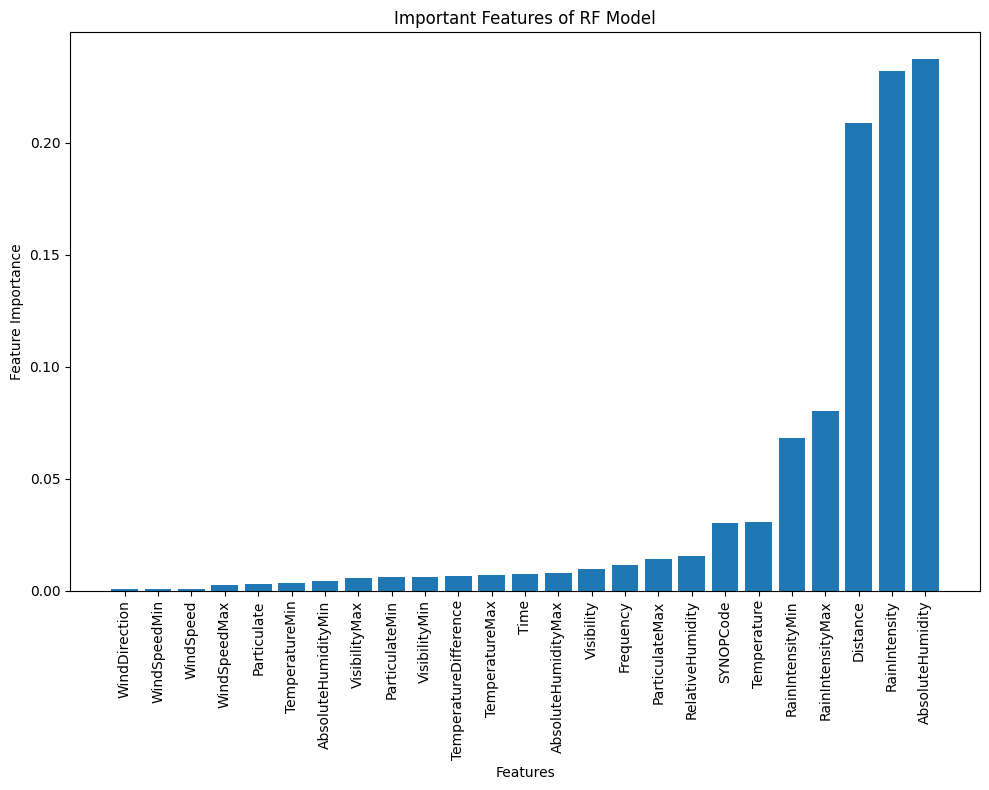

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def splitting_data(data, col_target, col_drop=None, test_size=0.2, SPLIT_val_test=True, random_state=42):

    if col_drop:
        data = data.drop(columns=col_drop)

    X = data.drop(columns=[col_target])
    y = data[col_target]

    XTRAIN, TEMP_X, YTRAIN, TEMP_Y = train_test_split(X, y, test_size=test_size, random_state=random_state)

    if SPLIT_val_test:
        XVAL, XTEST, YVAL, YTEST = train_test_split(TEMP_X, TEMP_Y, test_size=0.5, random_state=random_state)
    else:
        XVAL =  TEMP_X
        YVAL = TEMP_Y
        XTEST = None
        YTEST = None

    return XTRAIN, XVAL, XTEST, YTRAIN, YVAL, YTEST

def sorting_features_by_importance(model, X, plot=False):

    feat_import = model.feature_importances_
    features = X.columns

    sorted_indices = np.argsort(feat_import)
    sorted_by_features = []
    sorted_by_importance = []

    for i in sorted_indices:
        sorted_by_features.append(features[i])
        sorted_by_importance.append(feat_import[i])

    if plot:
        plt.figure(figsize=(10, 8))
        plt.barh(sorted_by_features, sorted_by_importance)
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance for Random Forest')
        plt.show()

    return sorted_by_features, sorted_by_importance

def display_feature_importance_as_table(features, importance, title="Feature Importance", top_n=10):

    importance_percentage = [imp * 100 for imp in importance]

    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance (%)': importance_percentage
    }).sort_values(by='Importance (%)', ascending=False)

    # displayingg only the TOP N FEATSS
    top_features_df = importance_df.head(top_n)

    print(f"\n{title} - Top {top_n} Features")
    print(top_features_df)


data = pd.read_csv("RFLFSODataFull.csv")


FSO_X_train, FSO_X_val, FSO_X_test, FSO_Y_train, FSO_Y_val, FSO_Y_test = splitting_data(
    data, "FSO_Att", col_drop=["Frequency", "RFL_Att"])

RF_X_train, RF_X_val, RF_X_test, RF_Y_train, RF_Y_val, RF_Y_test = splitting_data(
    data, "RFL_Att", col_drop=["FSO_Att"])

#bbest parameters for FSO Att: {'max_depth': 30,  'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}
#FSO

FSO_model = RandomForestRegressor(n_estimators=140, max_depth=30, min_samples_leaf=1,
                                  random_state=42, min_samples_split=2, oob_score=True, n_jobs=-1)

FSO_model.fit(FSO_X_train, FSO_Y_train)

FSO_sorted_by_features, FSO_sorted_by_importance = sorting_features_by_importance(FSO_model, FSO_X_train, plot=False)
display_feature_importance_as_table(FSO_sorted_by_features, FSO_sorted_by_importance, title="FSO Model Feature Importance")

print("FSO Feature Importance:", FSO_sorted_by_importance)

plt.figure(figsize=(10, 8))
plt.bar(FSO_sorted_by_features, FSO_sorted_by_importance)
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Important Features of FSO Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# bbest parameters for RF Att : {'max_depth': 30,  'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}
#RF

RF_model = RandomForestRegressor(n_estimators= 130, max_depth= 30, min_samples_leaf=1,
                                 random_state=42, min_samples_split=2)

RF_model.fit(RF_X_train, RF_Y_train)

RF_sorted_by_features, RF_sorted_by_importance = sorting_features_by_importance(RF_model, RF_X_train, plot=False)
display_feature_importance_as_table(RF_sorted_by_features, RF_sorted_by_importance, title="RF Model Feature Importance")

print("RF Feature Importance:", RF_sorted_by_importance)

plt.figure(figsize=(10, 8))
plt.bar(RF_sorted_by_features, RF_sorted_by_importance)
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Important Features of RF Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

def metrics_calculate(model, X_TRAIN, Y_TRAIN, X_VAL, Y_VAL, use_oob=True):
    PRED_Y_TRAIN = model.predict(X_TRAIN)
    PRED_Y_VAL = model.predict(X_VAL)

    RMSE_TRAIN = np.sqrt(mean_squared_error(Y_TRAIN, PRED_Y_TRAIN))
    RMSE_VAL = np.sqrt(mean_squared_error(Y_VAL, PRED_Y_VAL))
    R2_TRAIN = r2_score(Y_TRAIN, PRED_Y_TRAIN)
    R2_VAL = r2_score(Y_VAL, PRED_Y_VAL)

    R2_OOB = model.oob_score_ if use_oob and hasattr(model, "oob_score_") else None

    return RMSE_TRAIN, R2_TRAIN, RMSE_VAL, R2_VAL, R2_OOB

def feature_selection_wrapper(model, X_train, y_train, X_val, y_val, channel="FSO"):

    score_perform = []
    features = X_train.columns.tolist()

    for i in range(len(features) + 1):
        model.fit(X_train, y_train)
        feat_sort = sorted(zip(features, model.feature_importances_), key=lambda x: x[1])

        if i > 0:
            current_feature = feat_sort[0][0]
        else:
            current_feature = "All Features"

        metrics = metrics_calculate(model, X_train, y_train, X_val, y_val)
        score_perform.append((current_feature,) + metrics + (feat_sort[0][0], feat_sort[0][1]))

        if i > 0:
            features.remove(current_feature)
            X_train = X_train[features]
            X_val = X_val[features]

    return score_perform



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# bbest parameters for FSO Att : {'max_depth': 30,  'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}

FSO_model = RandomForestRegressor(n_estimators= 140, max_depth=30, min_samples_leaf=1,
                                  random_state=42, min_samples_split=2, oob_score=True, n_jobs=-1)

scores_of_performance_FSO = feature_selection_wrapper (FSO_model,FSO_X_train,FSO_Y_train,FSO_X_val,FSO_Y_val,channel = "FSO")

df_FSO = pd.DataFrame(scores_of_performance_FSO, columns= ["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","important_score"]
)

df_FSO.to_csv("FSO_feature_importance.csv", index=False)



In [ ]:
# bbest parameters for RF Att : {'max_depth': 30,  'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}

RF_model = RandomForestRegressor(n_estimators= 130, max_depth= 30, min_samples_leaf=1,
                                 random_state=42, min_samples_split=2, oob_score=True,n_jobs= -1 )


scores_of_performance_RF = feature_selection_wrapper (RF_model,RF_X_train,RF_Y_train,RF_X_val,RF_Y_val,channel = "RFL")

df_RF = pd.DataFrame(scores_of_performance_RF, columns = ["removing_feature", "RMSE_TRAIN", "R2_TRAIN","RMSE_VAL","R2_VAL", "R2_OOB","next_removing","important_score"]
)

df_RF.to_csv("RF_feature_importance.csv", index=False)

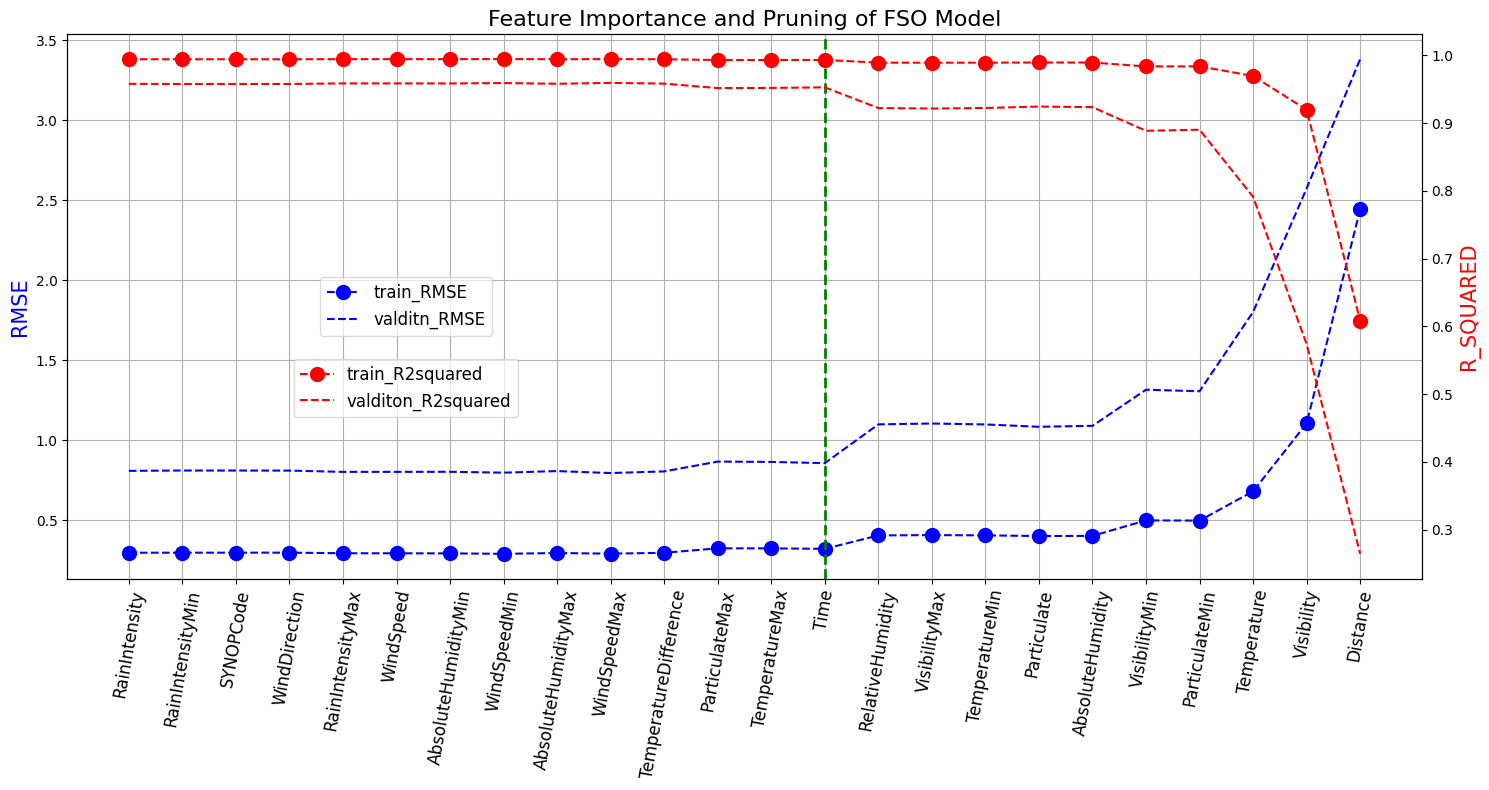

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(data, threshold_feature="VisibilityMin", model_name="FSO", marker_size=10, legend_positions=("upper left", "lower left")):

    feats = data["removing_feature"].tolist()
    rmse_train, rmse_val = data["RMSE_TRAIN"], data["RMSE_VAL"]
    r2_train, r2_val = data["R2_TRAIN"], data["R2_VAL"]

    if "All Features" in feats:
        index = feats.index("All Features")
        feats.pop(index)
        rmse_train, rmse_val, r2_train, r2_val = [metric.drop(index) for metric in [rmse_train, rmse_val, r2_train, r2_val]]

    fig, pl1 = plt.subplots(figsize=(15, 8))
    pl2 = pl1.twinx()

    # ploott RMSE and R2 for train and validation
    cls = ['blue', 'red']
    pl1.plot(feats, rmse_train, '--o', color=cls[0], markersize=marker_size, label="train_RMSE")
    pl1.plot(feats, rmse_val, '--', color=cls[0], markersize=marker_size, label="valditn_RMSE")
    pl2.plot(feats, r2_train, '--o', color=cls[1], markersize=marker_size, label="train_R2squared")
    pl2.plot(feats, r2_val, '--', color=cls[1], markersize=marker_size, label="valditon_R2squared")

    # labels,legends n styles nn tthreshold
    pl1.set_ylabel('RMSE', color=cls[0], fontsize=15)
    pl2.set_ylabel('R_SQUARED', color=cls[1], fontsize=15)
    pl1.set_title(f'Feature Importance and Pruning of {model_name} Model', fontsize=16)
    pl1.grid(True)

    pl1.legend(loc="center", bbox_to_anchor=(0.25, 0.5), framealpha=0.7, fontsize=12)
    pl2.legend(loc="center", bbox_to_anchor=(0.25, 0.35), framealpha=0.7, fontsize=12)

    
    if threshold_feature in feats:
        pl1.axvline(x=feats.index(threshold_feature), color='green', linestyle='--', linewidth=2)

    pl1.set_xticks(range(len(feats)))
    pl1.set_xticklabels(feats, rotation=80, fontsize=12)

    plt.tight_layout()
    plt.show()

# plott FSO
df_fso = pd.read_csv("FSO_feature_importance.csv")
plot_feature_importance(df_fso, threshold_feature="Time", model_name="FSO")


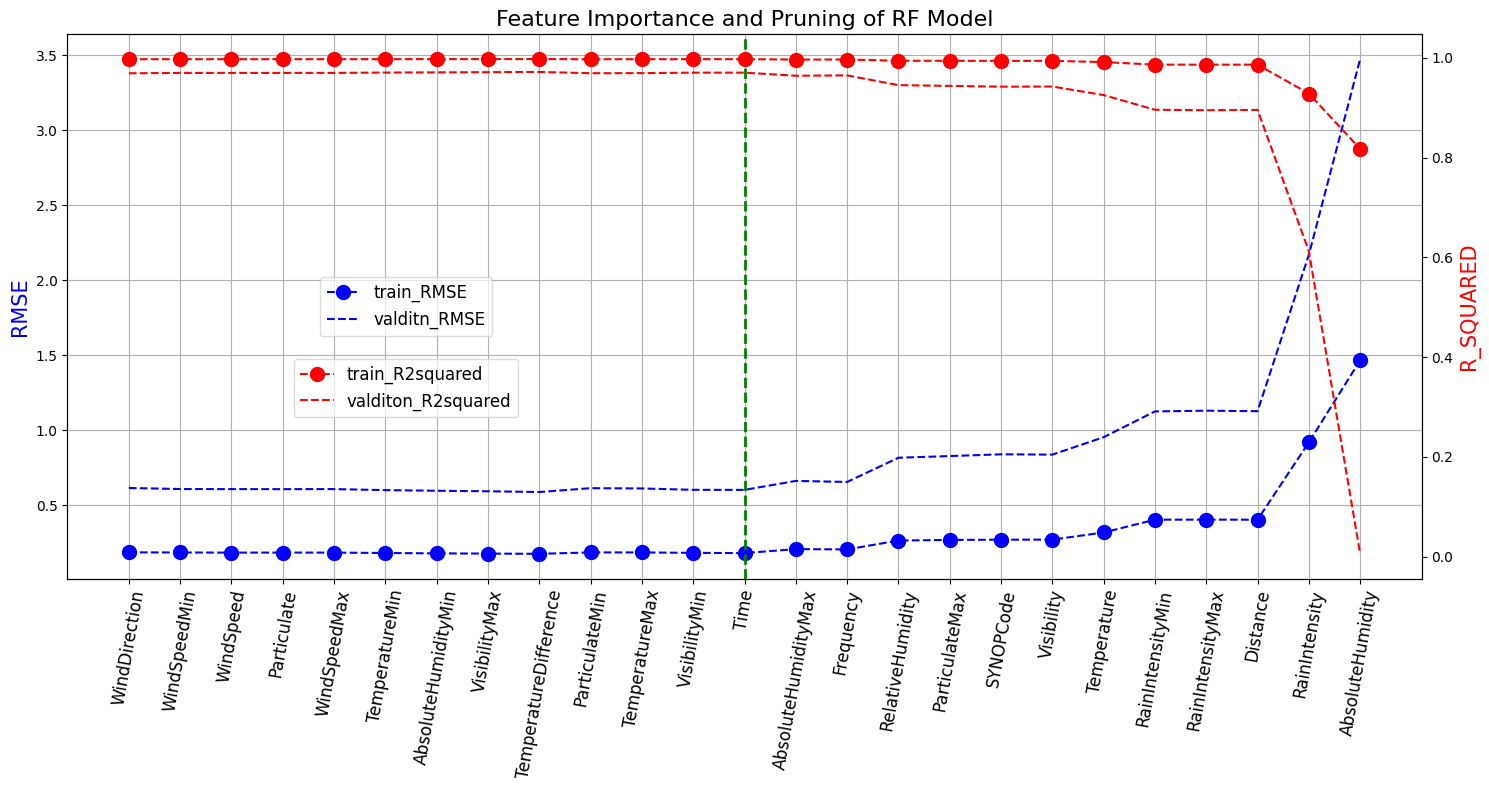

In [ ]:
# plot RF
df_rf = pd.read_csv("RF_feature_importance.csv")
plot_feature_importance(df_rf, threshold_feature="Time", model_name="RF")


In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def loading_data(filepath, frac=0.2):
    data = pd.read_excel(filepath)
    data_subset = data.sample(frac=frac, random_state=42)
    return data_subset

def spliting_data(X, y, test_size=0.2, val_size=0.2, random_state=42):
    bigtrain_X , test_X, big_train_Y, test_Y = train_test_split(X, y, test_size=test_size, random_state=random_state)
    train_X, val_X, train_Y, val_Y = train_test_split(bigtrain_X, big_train_Y, test_size=val_size, random_state=random_state)
    return train_X, val_X, test_X, train_Y, val_Y, test_Y

def model_evaluating(model, X_TRAIN, Y_TRAIN, X_VAL, Y_VAL, X_TEST, Y_TEST):
    PRED_Y_train = model.predict(X_TRAIN)
    PRED_Y_val = model.predict(X_VAL)
    PRED_Y_test = model.predict(X_TEST)

    RMSE_TRAIN = np.sqrt(mean_squared_error(Y_TRAIN, PRED_Y_train))
    RMSE_VAL = np.sqrt(mean_squared_error(Y_VAL, PRED_Y_val))
    RMSE_TEST = np.sqrt(mean_squared_error(Y_TEST, PRED_Y_test))

    R2_TRAIN = r2_score(Y_TRAIN, PRED_Y_train)
    R2_VAL = r2_score(Y_VAL, PRED_Y_val)
    R2_TEST = r2_score(Y_TEST, PRED_Y_test)

    return RMSE_TRAIN, RMSE_VAL, RMSE_TEST, R2_TRAIN, R2_VAL, R2_TEST

def grid_search(X_TRAIN, Y_TRAIN, param_grid):
    model = RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1, warm_start=True)
    grid_search_model = GridSearchCV(estimator=model,
                                     param_grid=param_grid,
                                     cv=5,
                                     n_jobs=-1,
                                     scoring='neg_mean_squared_error')

    grid_search_model.fit(X_TRAIN, Y_TRAIN)
    return grid_search_model.best_params_

def training_and_evaluating_model(X_TRAIN, Y_TRAIN, X_VAL, Y_VAL, X_TEST, Y_TEST, best_params):
    FINALmodel = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1, oob_score=True)
    FINALmodel.fit(X_TRAIN, Y_TRAIN)
    return model_evaluating(FINALmodel, X_TRAIN, Y_TRAIN, X_VAL, Y_VAL, X_TEST, Y_TEST)


FSO_DATA = loading_data("FSO_DATA_IMP.xlsx", frac=0.8)
RF_DATA = loading_data(filepath="RF_DATA_IMP.xlsx", frac=0.8)

FSO_X = FSO_DATA.drop(columns=['FSO_Att'])
FSO_Y = FSO_DATA['FSO_Att']
RF_X = RF_DATA.drop(columns=['RFL_Att'])
RF_Y = RF_DATA['RFL_Att']

FSO_X_train, FSO_X_val, FSO_X_test, FSO_Y_train, FSO_Y_val, FSO_Y_test = spliting_data(FSO_X, FSO_Y)
RF_X_train, RF_X_val, RF_X_test, RF_Y_train, RF_Y_val, RF_Y_test = spliting_data(RF_X, RF_Y)

param_grid = {
      'n_estimators': [100, 150, 200],
      'max_depth': [10, 20, 30],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
    }


FSO_best_param = grid_search(FSO_X_train, FSO_Y_train, param_grid)
RF_best_param = grid_search(RF_X_train, RF_Y_train, param_grid)


Results_FSO = training_and_evaluating_model(FSO_X_train, FSO_Y_train, FSO_X_val, FSO_Y_val, FSO_X_test, FSO_Y_test, FSO_best_param)
Results_RF = training_and_evaluating_model(RF_X_train, RF_Y_train, RF_X_val, RF_Y_val, RF_X_test, RF_Y_test, RF_best_param)

print(f"Best Parameters for FSO: {FSO_best_param}")
print(f"Best Parameters for RF: {RF_best_param}")

print(f"FSO - Training RMSE: {Results_FSO[0]:.2f}, Validaton RMSE: {Results_FSO[1]:.2f}, Test RMSE: {Results_FSO[2]:.2f}")
print(f"FSO - Training R2: {Results_FSO[3]*100:.2f}%, Validaton R2: {Results_FSO[4]*100:.2f}%, Test R2: {Results_FSO[5]*100:.2f}%")
print(f"RF - Training RMSE: {Results_RF[0]:.2f}, Validaton RMSE: {Results_RF[1]:.2f}, Test RMSE: {Results_RF[2]:.2f}")
print(f"RF - Training R2: {Results_RF[3]*100:.2f}%, Validaton R2: {Results_RF[4]*100:.2f}%, Test R2: {Results_RF[5]*100:.2f}%")

FSO_X_train_VAL = np.concatenate([FSO_X_train, FSO_X_val])
FSO_Y_train_VAL = np.concatenate([FSO_Y_train, FSO_Y_val])
RF_X_train_VAL = np.concatenate([RF_X_train, RF_X_val])
RF_Y_train_VAL = np.concatenate([RF_Y_train, RF_Y_val])

FSO_FINAL = RandomForestRegressor(**FSO_best_param, random_state=42, n_jobs=-1, oob_score=True)
FSO_FINAL.fit(FSO_X_train_VAL, FSO_Y_train_VAL)
FSO_RMSE_TRAIN, FSO_RMSE_VAL, FSO_RMSE_TEST, RF_R2_TRAIN, RF_R2_VAL, FSO_R2_TEST = model_evaluating(FSO_FINAL, FSO_X_train_VAL, FSO_Y_train_VAL, FSO_X_train_VAL, FSO_Y_train_VAL, FSO_X_test, FSO_Y_test)

RF_FINAL = RandomForestRegressor(**RF_best_param, random_state=42, n_jobs=-1, oob_score=True)
RF_FINAL.fit(RF_X_train_VAL, RF_Y_train_VAL)
RF_RMSE_TRAIN, RF_RMSE_VAL, RF_RMSE_TEST, RF_R2_TRAIN, RF_R2_VAL, RF_R2_TEST = model_evaluating(RF_FINAL, RF_X_train_VAL, RF_Y_train_VAL, RF_X_train_VAL, RF_Y_train_VAL, RF_X_test, RF_Y_test)


print(f"FSO - Final Test RMSE: {FSO_RMSE_TEST:.2f}, Final Test R2: {FSO_R2_TEST*100:.2f}%")
print(f"RF - Final Test RMSE: {RF_RMSE_TEST:.2f}, Final Test R2: {RF_R2_TEST*100:.2f}%")


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for FSO: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for RF: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
FSO - Training RMSE: 0.36, Validaton RMSE: 0.94, Test RMSE: 0.95
FSO - Training R2: 99.16%, Validaton R2: 94.33%, Test R2: 94.06%
RF - Training RMSE: 0.21, Validaton RMSE: 0.56, Test RMSE: 0.53
RF - Training R2: 99.63%, Validaton R2: 97.35%, Test R2: 97.62%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


FSO - Final Test RMSE: 0.90, Final Test R2: 94.64%
RF - Final Test RMSE: 0.49, Final Test R2: 97.96%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
